<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Decision Trees 

## The Data

We will be using the same dataset through our discussions on classification with tree-methods (Decision Tree,Random Forests, and Gradient Boosted Trees) in order to compare performance metrics across these related models.

We will work with the "Palmer Penguins" dataset, as it is simple enough to help us fully understand how changing hyperparameters can change classification results.


<img src="penguin.jpg" style="max-width:400px">

Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

Summary:
The data folder contains two CSV files. For intro courses/examples, you probably want to use the first one (penguins_size.csv).

* penguins_size.csv: Simplified data from original penguin data sets. Contains variables:

    * species: penguin species (Chinstrap, Adélie, or Gentoo)
    * culmen_length_mm: culmen length (mm)
    * culmen_depth_mm: culmen depth (mm)
    * flipper_length_mm: flipper length (mm)
    * body_mass_g: body mass (g)
    * island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * sex: penguin sex

* (Not used) penguins_lter.csv: Original combined data for 3 penguin species  

Note: The culmen is "the upper ridge of a bird's beak" 

**Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../Data/penguins_size.csv')

In [4]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [11]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [8]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

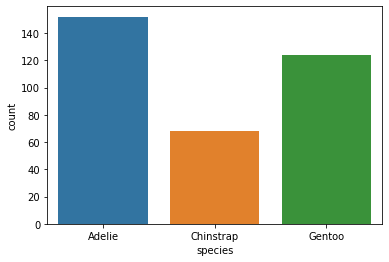

In [10]:
sns.countplot(data=df, x='species');

# Missing Data

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [12]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

---

If we are simply dropping rows which have missing value, we end up with 334 entries out of original 344. 10 rows are gone.

In [15]:
df = df.dropna()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [18]:
# what percentage did we drop?
100*(10/344)

2.9069767441860463

In [19]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


-----

In [20]:
df['island'].value_counts()

Biscoe       164
Dream        123
Torgersen     47
Name: island, dtype: int64

In [21]:
df['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

We can see there is one row with sex value is "."

In [26]:
df[df['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


The above row has all the information, but only sex value has bad info.

We can either choose to 
- drop this row (OR)
- compare the information from other rows with similar values of this row anf fill up with most likely sex value.


### Comparing with FEMALE , MALE Group values
- when we compare the data we can check for mean, min, max values for each features against each group
- and deduct which sex group this missing row can be.


In [25]:
df[df['species'] == 'Gentoo'].groupby('sex').describe().transpose()

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

### Reassign the value of specific row using `at`
After comparing the values against with each group, we decided to choose to set it as "FEMALE"

In [27]:
# reassign the specific row 
df.at[336, 'sex'] = 'FEMALE'

In [28]:
df.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm       217
body_mass_g            4875
sex                  FEMALE
Name: 336, dtype: object

-------

# Visualization

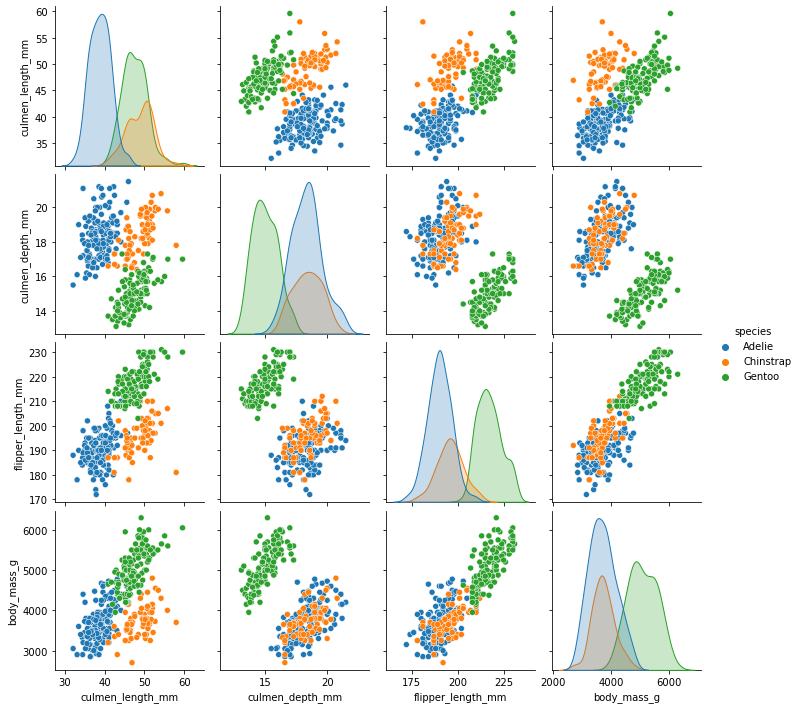

In [30]:
sns.pairplot(df, hue='species');

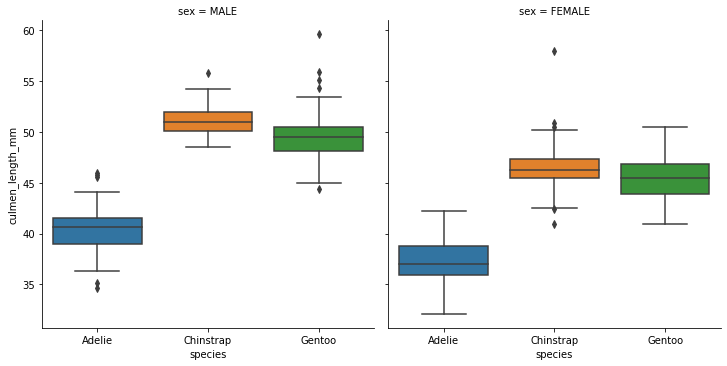

In [34]:
sns.catplot(x='species', y='culmen_length_mm', data=df, kind='box', col='sex');

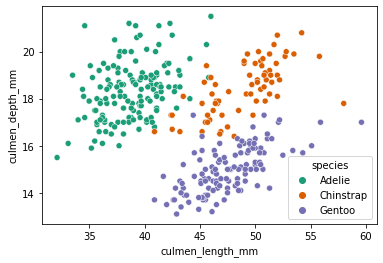

In [36]:
sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm', data=df, hue='species', palette='Dark2');

------

# Feature Engineering

In [38]:
df.head(2)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE


### Encoding

- As we have some of the features as categorical values (island, sex) we want to encode those values.
- we can leave species label as string value. 

In [41]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [45]:
pd.get_dummies(df.drop('species', axis=1), drop_first=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


# Train | Test Split

In [46]:
X = pd.get_dummies(df.drop('species', axis=1), drop_first=True)

In [47]:
y = df['species']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Decision Tree Classifier

## Default Hyperparameters

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
model = DecisionTreeClassifier()

In [52]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
base_pred = model.predict(X_test)

In [55]:
# base_pred

## Evaluation

In [56]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

In [57]:
confusion_matrix(y_test, base_pred)

array([[41,  0,  0],
       [ 2, 21,  0],
       [ 0,  0, 37]], dtype=int64)

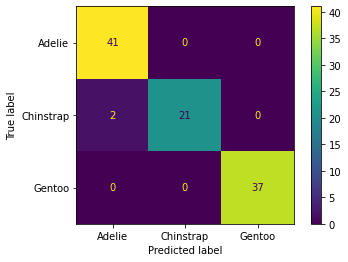

In [59]:
plot_confusion_matrix(model, X_test, y_test);

In [61]:
print(classification_report(y_test, base_pred))

              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.98        41
   Chinstrap       1.00      0.91      0.95        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.97      0.98       101
weighted avg       0.98      0.98      0.98       101



### Feature importance
- to interpret: same order

In [62]:
model.feature_importances_

array([0.34772106, 0.05289252, 0.53120101, 0.        , 0.0681854 ,
       0.        , 0.        ])

In [63]:
X.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
      dtype='object')

----

We can see that `flipper_length_mm` has the most important feature as per the values.

In [70]:
pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Feature Importance'])

,Feature Importance
culmen_length_mm,0.347721
culmen_depth_mm,0.052893
flipper_length_mm,0.531201
body_mass_g,0.000000
island_Dream,0.068185
island_Torgersen,0.000000
sex_MALE,0.000000


In [69]:
pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Feature Importance']).sort_values('Feature Importance', ascending=False)

,Feature Importance
flipper_length_mm,0.531201
culmen_length_mm,0.347721
island_Dream,0.068185
culmen_depth_mm,0.052893
body_mass_g,0.000000
island_Torgersen,0.000000
sex_MALE,0.000000


So why features like `body_mass_g` and `island_Torgersen` are not being considered as important?

It is because of the hyperparmeters that model is using to contruct the tree. In our case none was given.

So often it is not even considering every features, unless we really push Decision Tree try to use every features. But we also need to take note that this may lead to overfitting.

-------

To understand what is acutally happening insides the tree, we can visualize it.

In [71]:
from sklearn.tree import plot_tree

[Text(167.4, 199.32, 'X[2] <= 206.5\ngini = 0.633\nsamples = 233\nvalue = [105, 45, 83]'),
 Text(91.30909090909091, 163.07999999999998, 'X[0] <= 42.35\ngini = 0.418\nsamples = 147\nvalue = [104, 42, 1]'),
 Text(60.872727272727275, 126.83999999999999, 'gini = 0.0\nsamples = 97\nvalue = [97, 0, 0]'),
 Text(121.74545454545455, 126.83999999999999, 'X[4] <= 0.5\ngini = 0.274\nsamples = 50\nvalue = [7, 42, 1]'),
 Text(60.872727272727275, 90.6, 'X[0] <= 47.2\ngini = 0.245\nsamples = 7\nvalue = [6, 0, 1]'),
 Text(30.436363636363637, 54.359999999999985, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0]'),
 Text(91.30909090909091, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(182.61818181818182, 90.6, 'X[0] <= 44.2\ngini = 0.045\nsamples = 43\nvalue = [1, 42, 0]'),
 Text(152.1818181818182, 54.359999999999985, 'X[1] <= 17.9\ngini = 0.32\nsamples = 5\nvalue = [1, 4, 0]'),
 Text(121.74545454545455, 18.119999999999976, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(182.618

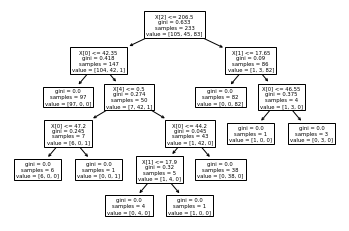

In [72]:
plot_tree(model)

We can see the little figure at the bottom part.

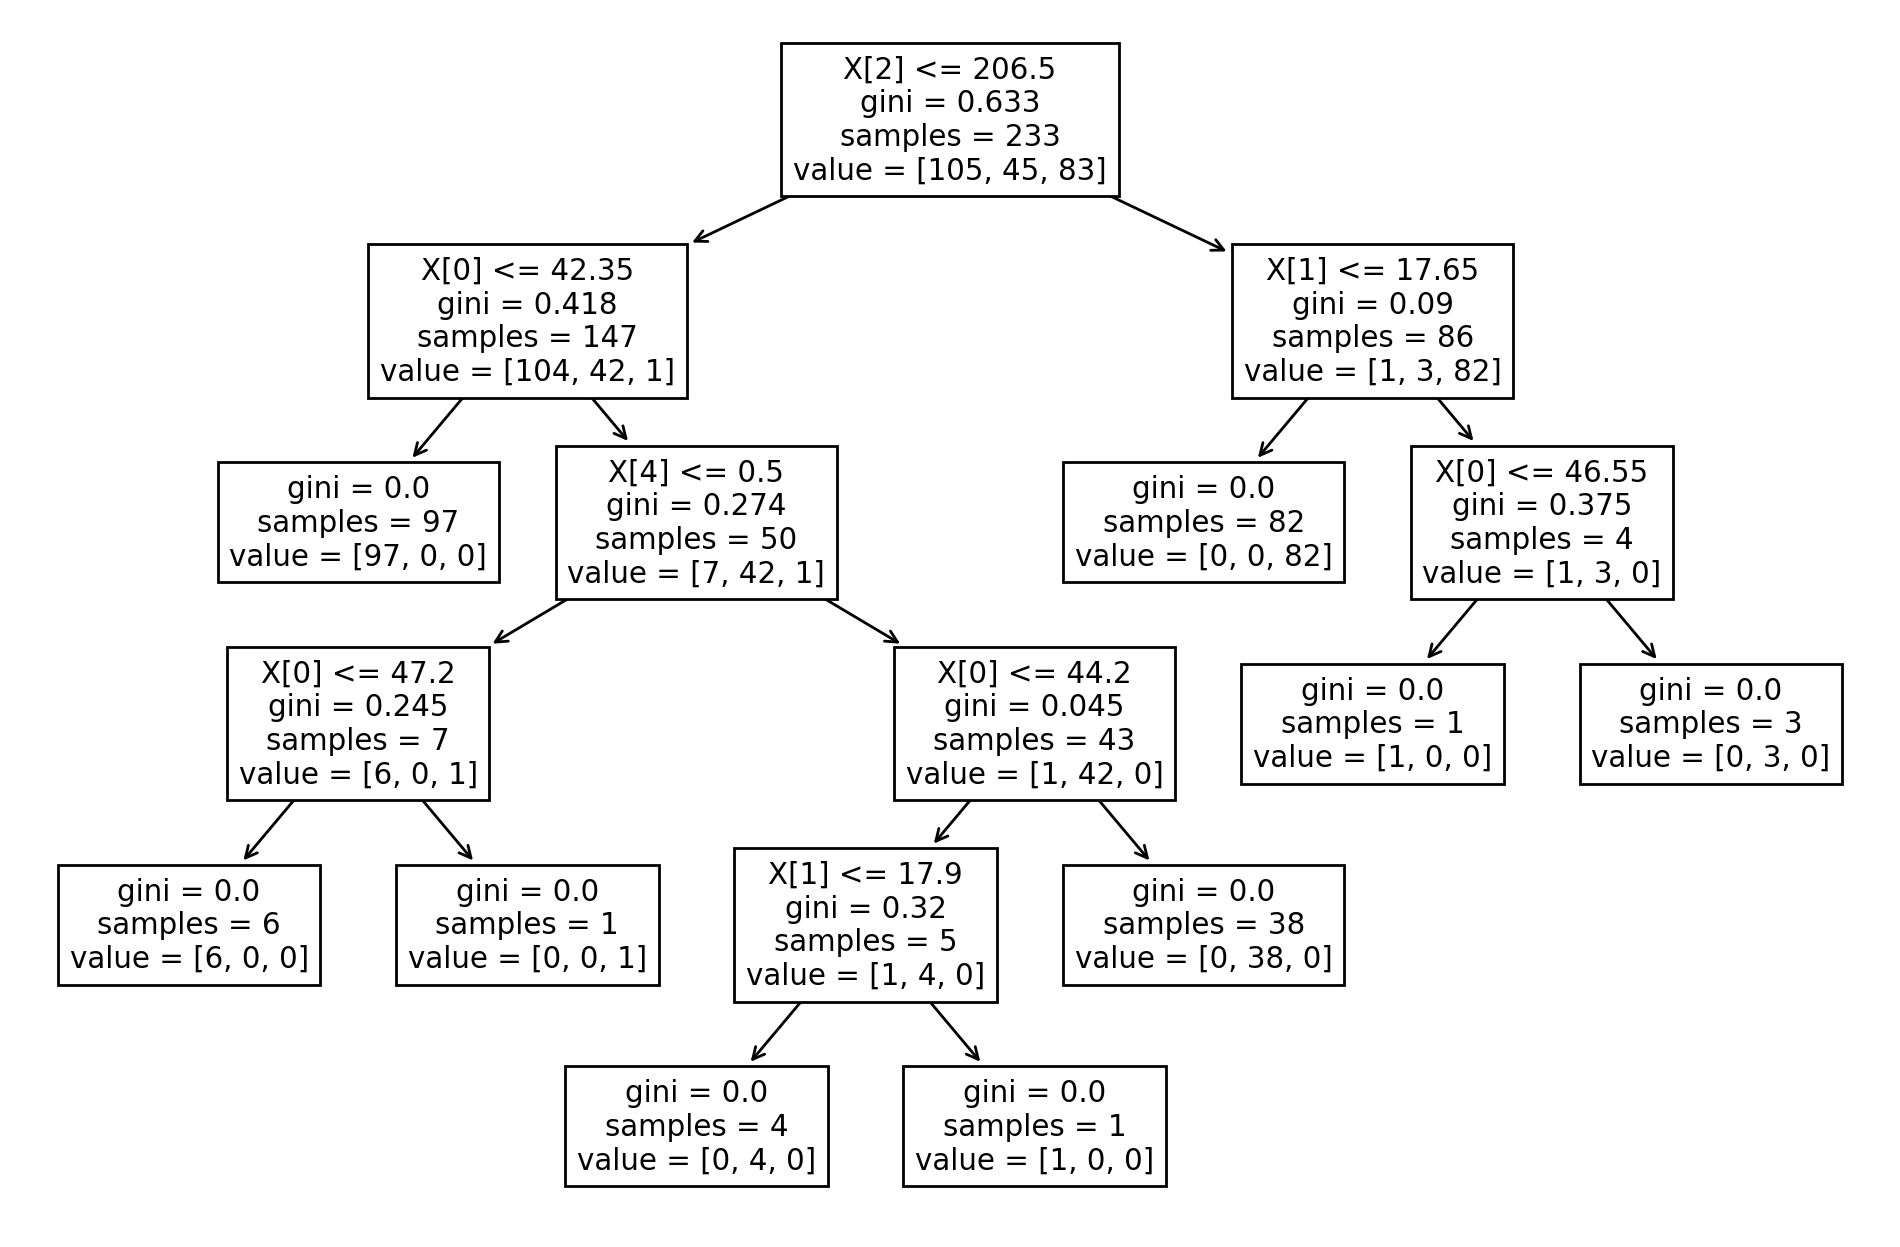

In [75]:
plt.figure(figsize=(12,8), dpi=200)
plot_tree(model);

we can see that `X[2]` is the base node, where index 2 of our dataset is `flipper lenght mm`.

That's why it got considered as the most important feature.

# Visualize the Tree

https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

- `filled`: to be more visually appealing
- `gini`: gini impurity
- `samples`: number of samples
- `value`: label of each categories (in our case there are 3 penguin species)

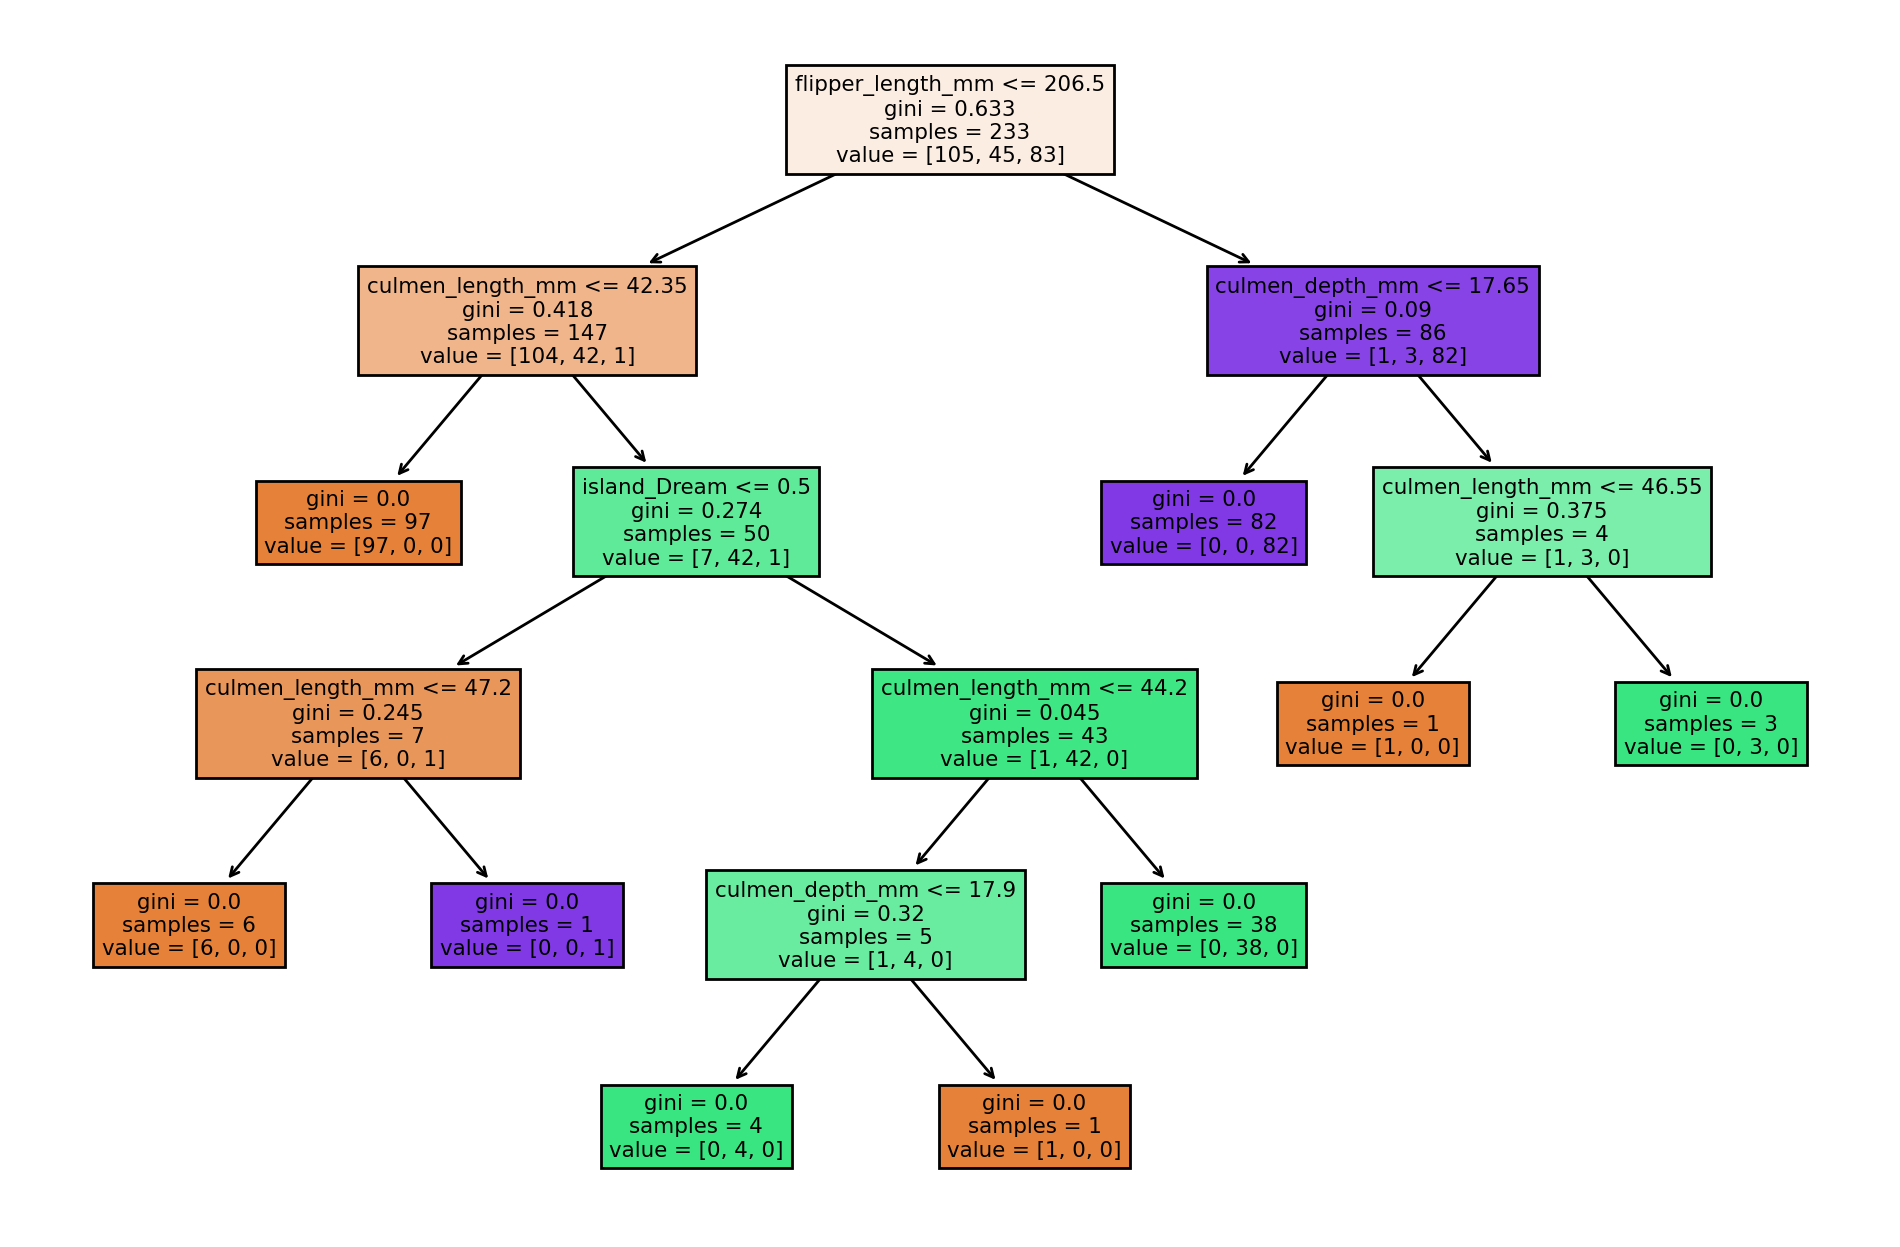

In [77]:
# we can pass the feature names as parameter to be drawn in the chart directly
# filled to have more visually appealing

plt.figure(figsize=(12,8), dpi=200)
plot_tree(model, feature_names=X.columns, filled=True);

In [79]:
len(X_train)

233

# Reporting Model Results

To make it easier to report in the future, we will create a new function.

In [85]:
def report_model(model):
    model_pred = model.predict(X_test)
    
    print(classification_report(y_test, model_pred))
    print('\n')
    
    plt.figure(figsize=(12,8), dpi=150)
    plot_tree(model, feature_names=X.columns, filled=True);

              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.98        41
   Chinstrap       1.00      0.91      0.95        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.97      0.98       101
weighted avg       0.98      0.98      0.98       101





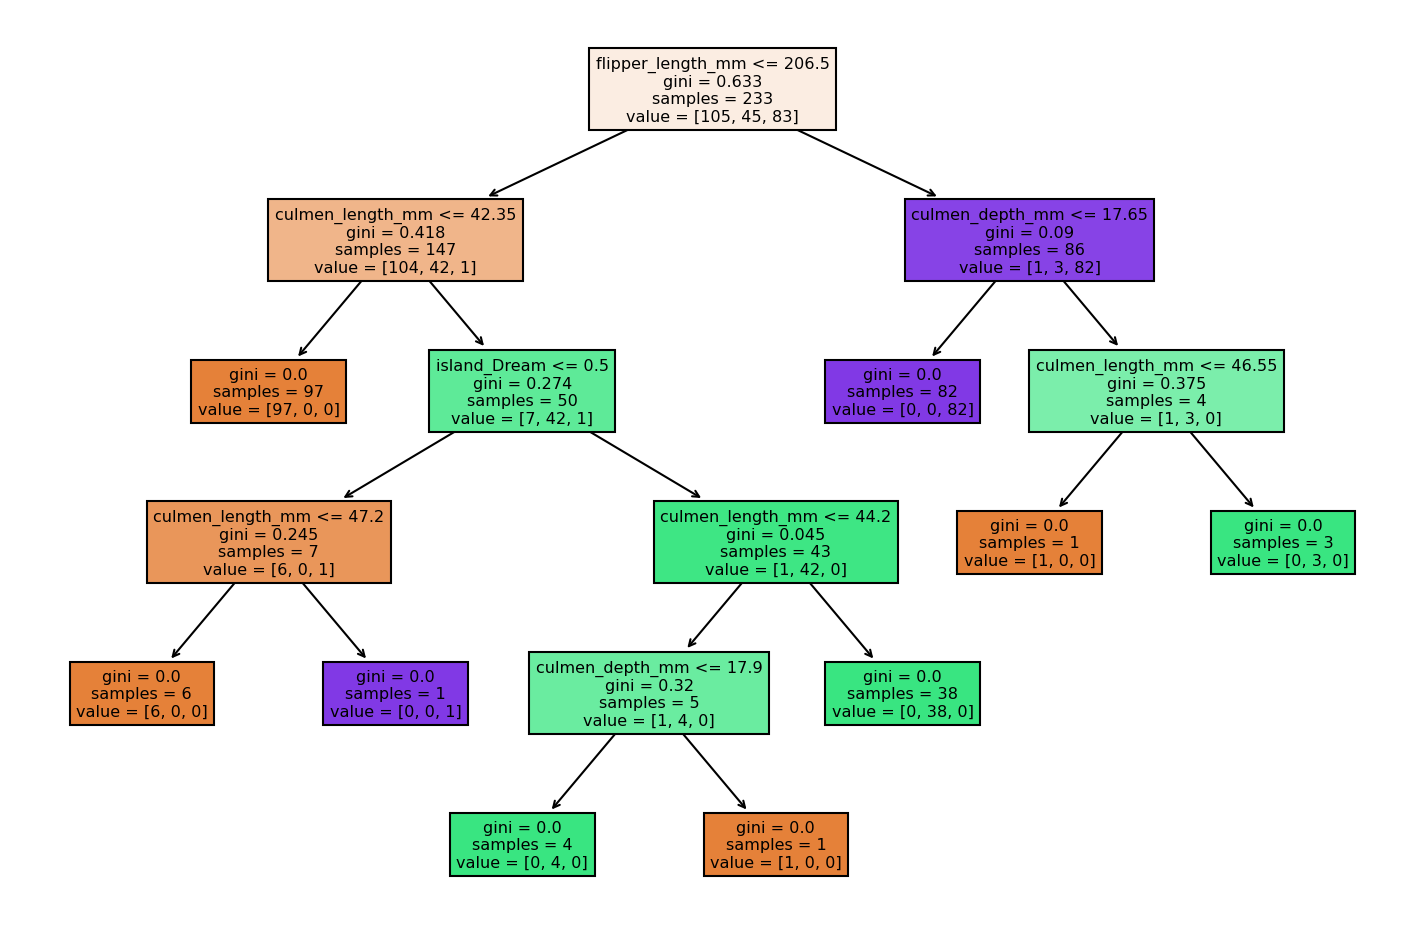

In [86]:
report_model(model)

------

# Understanding Hyperparameters

## Max Depth

The base model has the max depth level of 5. So we will expirement reducing it.

In [87]:
pruned_tree = DecisionTreeClassifier(max_depth=2)

In [88]:
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.81      0.96      0.88        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.93      0.94      0.93       101
weighted avg       0.95      0.94      0.94       101





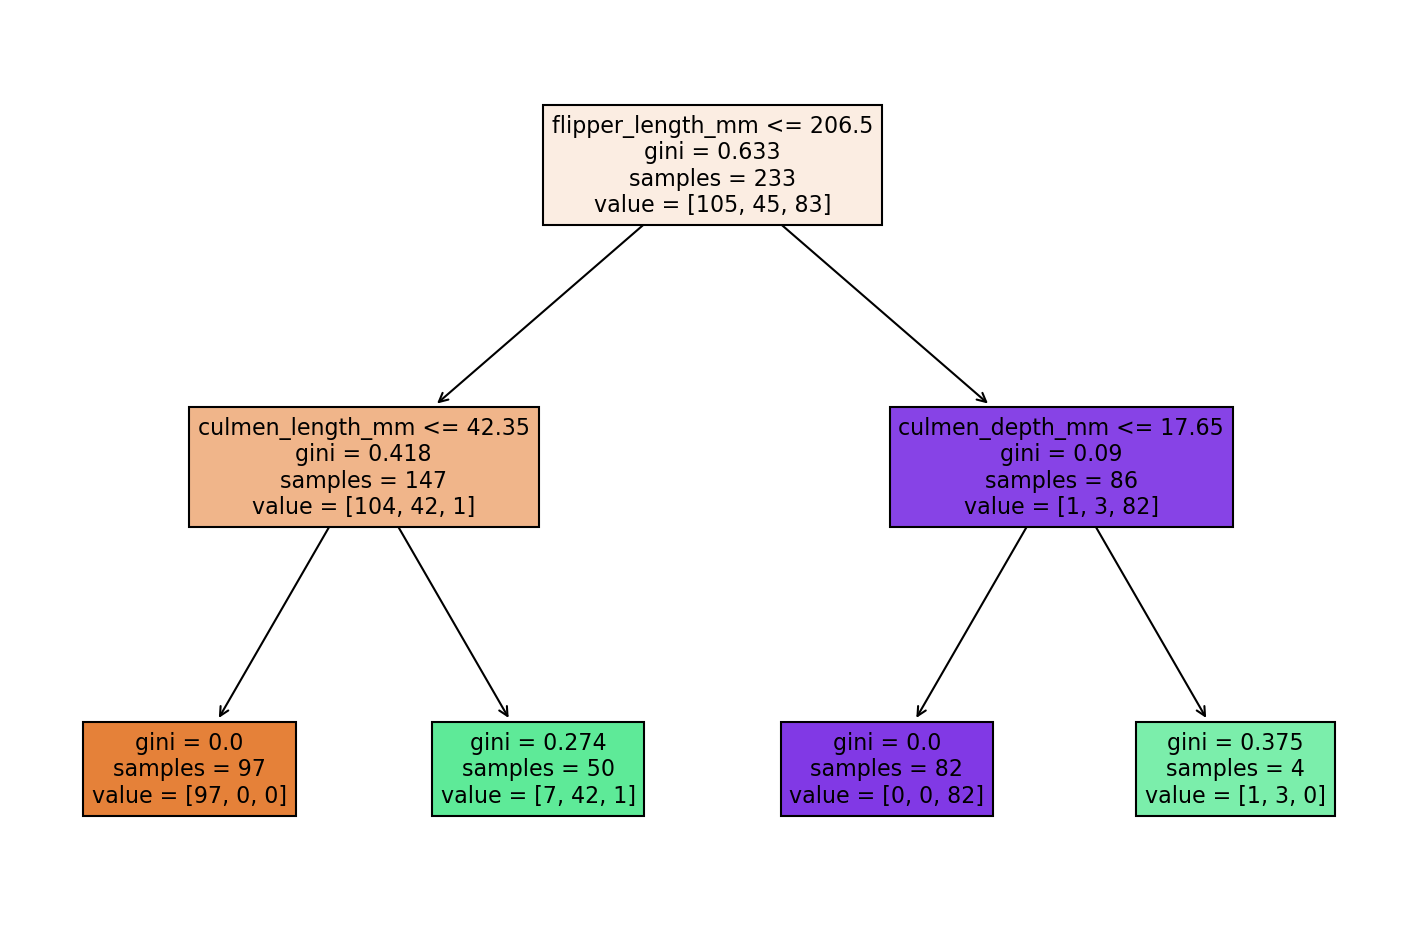

In [89]:
report_model(pruned_tree)

----

## Max Leaf Nodes

In [90]:
max_leaf_tree = DecisionTreeClassifier(max_leaf_nodes=3)

In [91]:
max_leaf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.83      0.87      0.85        23
      Gentoo       0.93      1.00      0.96        37

    accuracy                           0.92       101
   macro avg       0.91      0.92      0.91       101
weighted avg       0.92      0.92      0.92       101





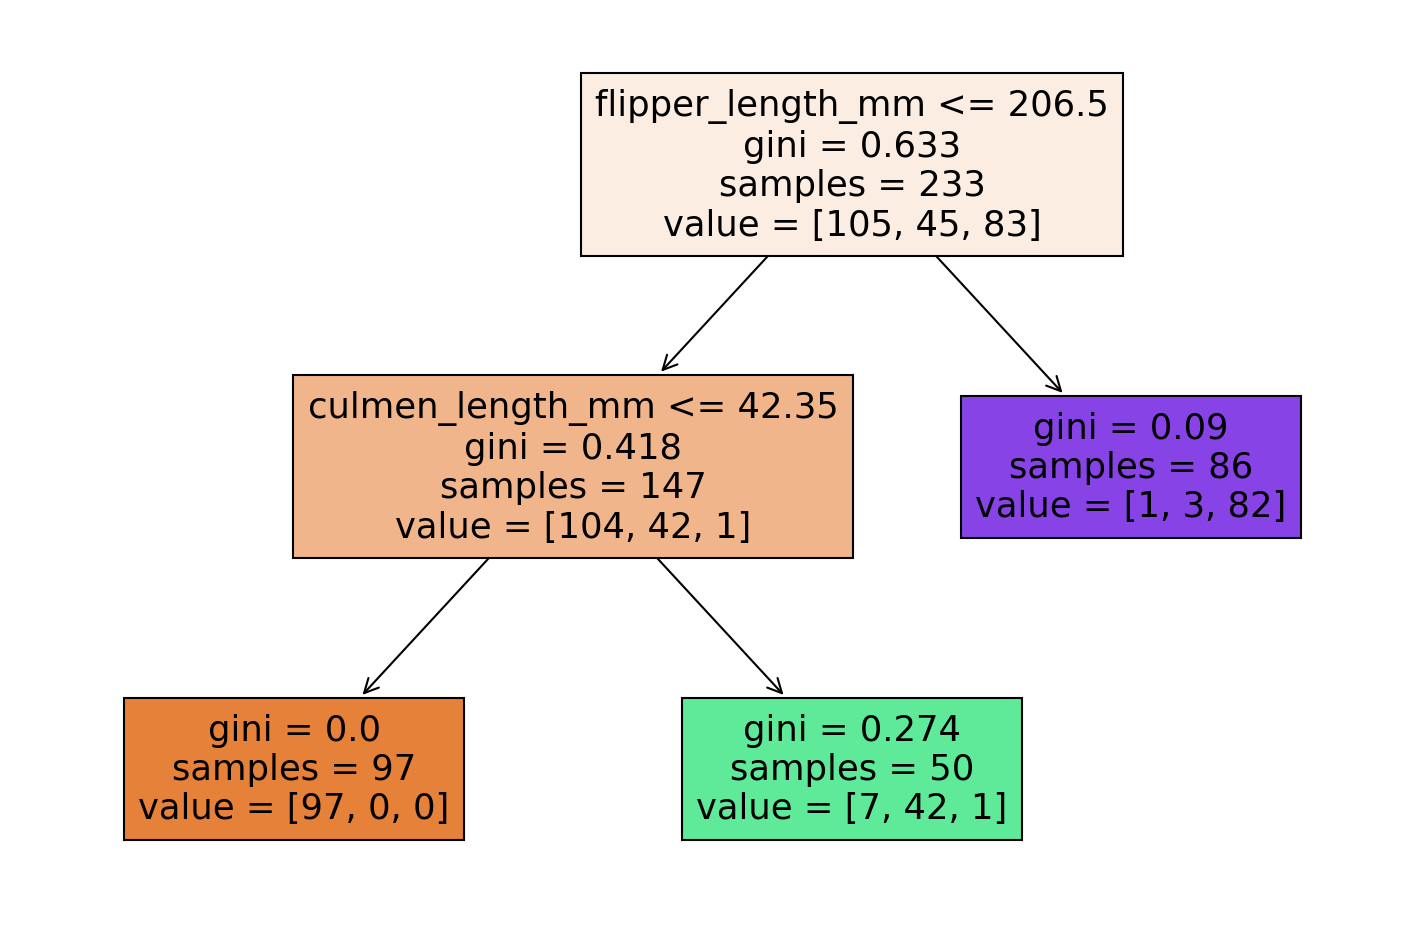

In [92]:
report_model(max_leaf_tree)

-----

## Criterion

- default: gini impurity

In [93]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')

In [94]:
entropy_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       0.91      0.95      0.93        41
   Chinstrap       0.90      0.83      0.86        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.94      0.93      0.93       101
weighted avg       0.94      0.94      0.94       101





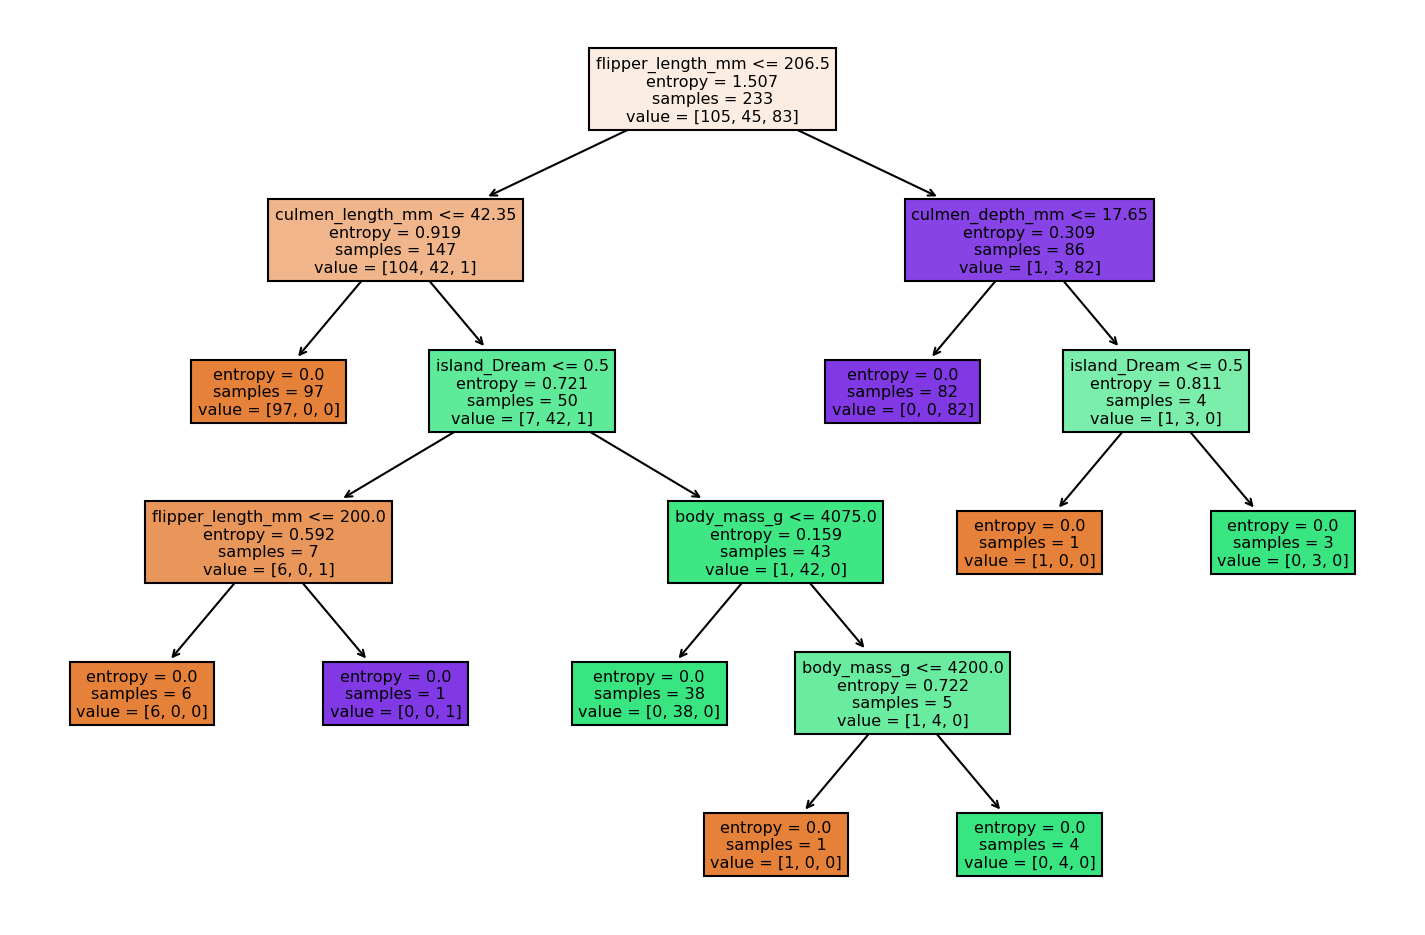

In [95]:
report_model(entropy_tree)